In [1]:
import matplotlib.image as image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

The Shape of the image is: (112, 92)
The image as array is:
[[48 49 45 ... 56 56 54]
 [45 52 39 ... 52 50 51]
 [45 50 42 ... 48 53 50]
 ...
 [50 48 50 ... 45 46 46]
 [45 54 49 ... 46 47 47]
 [51 51 51 ... 47 46 46]]


The image as it is:


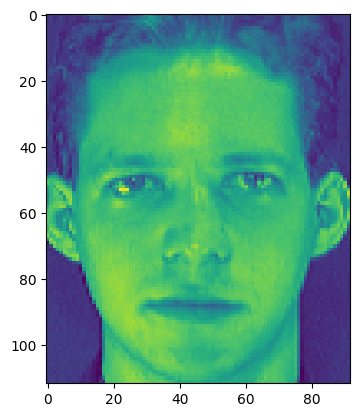

In [2]:
img=image.imread(r'images/s1/1.pgm')
print('The Shape of the image is:',img.shape)
print('The image as array is:')
print(img)
print('\n\nThe image as it is:')
plt.imshow(img)
plt.show()

In [3]:
data =[]
y = []
for p in range(1,41):
    for i in range(1,11):
        #print("images//s" + str(p)+ "//"+ str(i) +".pgm")
        img=image.imread("images//s" + str(p)+ "//"+ str(i) +".pgm")
        data.append(img)
        y.append(p)


In [4]:
y = np.array(y)
y.shape

(400,)

In [5]:
data = np.array(data).reshape(400,10304)

In [6]:
data

array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       ...,
       [125, 119, 124, ...,  36,  39,  40],
       [119, 120, 120, ...,  89,  94,  85],
       [125, 124, 124, ...,  36,  35,  34]], dtype=uint8)

In [7]:
#for col in range(data.shape[1]):
    #print(data[:,col])
data.shape

(400, 10304)

## Splitting the data


In [8]:
#for selecting all the odd and even rows separately
odd_rows=[]
even_rows=[]
odd_target =[]
even_target =[]
for i in range(data.shape[0]):
    if i %2 == 1:
        odd_rows.append(data[i,:])
        odd_target.append(y[i])
    else:
        even_rows.append(data[i,:])
        even_target.append(y[i])
        
odd_rows = np.array(odd_rows)
even_rows = np.array(even_rows)
odd_target = np.array(odd_target)
even_target = np.array(even_target)

In [9]:
X_train, X_test, y_train, y_test = odd_rows, even_rows, odd_target, even_target

## Bonus Classifier (SVM)

In [10]:
from sklearn import svm
from sklearn import metrics

In [11]:
svm_linear = svm.SVC(kernel = "linear", degree = 3)
svm_rbf = svm.SVC(kernel = "rbf", degree = 3 ) 
svm_poly = svm.SVC(kernel = "poly" , degree = 3)

##### Using Original train_test_split

In [12]:
svm_linear.fit(X_train,y_train)
svm_rbf.fit(X_train,y_train)
svm_poly.fit(X_train,y_train)               

SVC(kernel='poly')

In [13]:
y1_predict = svm_linear.predict(X_test)
y2_predict = svm_rbf.predict(X_test)
y3_predict = svm_poly.predict(X_test)

In [14]:
dict = {"Linear SVM output": y1_predict,
       "RBF SVM output": y2_predict,
       "Poly SVM output": y3_predict,
       "Actual output": y_test}
dict = pd.DataFrame(dict)
dict.head(30)

,Linear SVM output,RBF SVM output,Poly SVM output,Actual output
0,1,16,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,2,2,2,2
6,2,2,2,2
7,2,2,2,2
8,2,2,2,2
9,2,2,2,2


In [56]:
print("Linear: ", round(accuracy_score(y1_predict,y_test)*100,3) , "%" , sep = "")
print("RBF: ", round(accuracy_score(y2_predict,y_test)*100,3) , "%" , sep = "")
print("Poly: ", round(accuracy_score(y3_predict,y_test)*100,3) , "%" , sep = "")

Linear: 96.5%
RBF: 90.0%
Poly: 95.5%


##### Using Bonus train_test_split

In [15]:
X_train2, X_test2, y_train2,y_test2 = train_test_split(data,y,test_size=0.3, random_state=42)

In [16]:
svm_linear.fit(X_train2,y_train2)
svm_rbf.fit(X_train2,y_train2)
svm_poly.fit(X_train2,y_train2)               

SVC(kernel='poly')

In [17]:
y1_predict2 = svm_linear.predict(X_test2)
y2_predict2 = svm_rbf.predict(X_test2)
y3_predict2 = svm_poly.predict(X_test2)

In [18]:
dict = {"Linear SVM output": y1_predict2,
       "RBF SVM output": y2_predict2,
       "Poly SVM output": y3_predict2,
       "Actual output": y_test2}
dict = pd.DataFrame(dict)
dict.head(30)

,Linear SVM output,RBF SVM output,Poly SVM output,Actual output
0,21,21,21,21
1,29,29,29,29
2,4,4,4,4
3,22,22,22,22
4,10,10,10,10
5,9,9,9,9
6,33,33,33,33
7,10,10,10,10
8,27,27,27,27
9,13,13,13,13


In [55]:
print("Linear: ", round(accuracy_score(y1_predict2,y_test2)*100,3) , "%" , sep = "")
print("RBF: ", round(accuracy_score(y2_predict2,y_test2)*100,3) , "%" , sep = "")
print("Poly: ", round(accuracy_score(y3_predict2,y_test2)*100,3) , "%" , sep = "")

Linear: 98.333%
RBF: 87.5%
Poly: 98.333%


## --------------------------------------------

In [19]:
trainSet=np.arange(2885120).reshape(280,10304)
testSet=np.arange(1236480).reshape(120,10304)
trainLabel= np.arange(280).reshape(280,1)
testLabel= np.arange(120).reshape(120,1)

j,k=7,3
classLabel=1
for i in range(0,401,10):
    if( i != 0 ):
        trainSet[j-7:j,:]=data[i-10:i-3,:]
        testSet[k-3:k,:]=data[i-3:i,:]
        trainLabel[j-7:j]= np.full((7,1), classLabel, dtype=int)
        testLabel[k-3:k]= np.full((3,1), classLabel, dtype=int)
        classLabel+=1
        j+=7
        k+=3

In [20]:
#calculate mean face of the training set.
trainMean=np.mean(trainSet,axis=0)
#subtract the mean face from the training set.
centerTrainMatrix=trainSet-trainMean
#compute the covariance matrix from obtained centered data matrix.
covMatrix=np.cov(centerTrainMatrix, rowvar=False, bias=True)

In [21]:
#compute eigen vectors and values from obtained covariance matrix.
eigVal,eigVectMatrix=np.linalg.eigh(covMatrix)
#flip both eigen values and vectors in order to be sorted descendingly.
eigVal=np.flip(eigVal,axis=0)
eigVectMatrix=np.flip(eigVectMatrix,axis=1)

In [22]:
#utility method to compute the dimenison required for the specificed alpha value. 
def computeDimensionality(eigVal,threshold):
    totalDataVariance=np.sum(eigVal)
    varianceFraction,numDim,eigValSum=0,1,0
    
    while(varianceFraction<threshold):
        eigValSum+=eigVal[numDim-1]
        varianceFraction=eigValSum/totalDataVariance
        numDim+=1
    return numDim

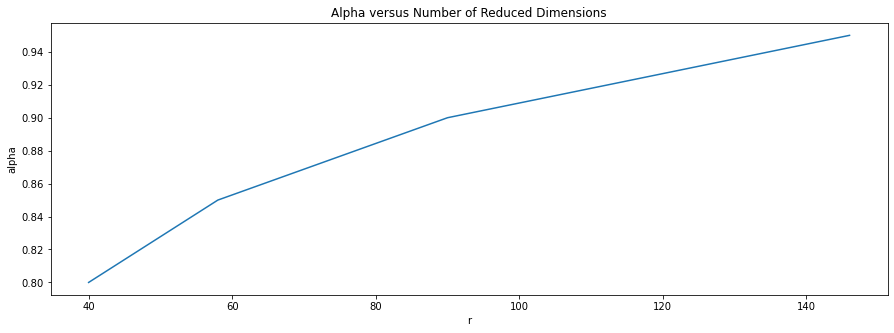

In [23]:
#Calculating dimension needed for four alpha values ( 0.8 , 0.85 , 0.9 , 0.95)
dimAlpha1=computeDimensionality(eigVal,0.8)
dimAlpha2=computeDimensionality(eigVal,0.85)
dimAlpha3=computeDimensionality(eigVal,0.9)
dimAlpha4=computeDimensionality(eigVal,0.95)

#plotting relation between r and alpha.
plt.plot([dimAlpha1,dimAlpha2,dimAlpha3,dimAlpha4], [0.8,0.85,0.9,0.95]);
plt.title('Alpha versus Number of Reduced Dimensions');
plt.gcf().set_size_inches(15,5);
plt.xlabel('r');
plt.ylabel('alpha');

In [24]:
#Computing the projection matrix, one for each alpha value.
projMat1=eigVectMatrix[:,0:dimAlpha1]
projMat2=eigVectMatrix[:,0:dimAlpha2]
projMat3=eigVectMatrix[:,0:dimAlpha3]
projMat4=eigVectMatrix[:,0:dimAlpha4]

In [25]:
#Projecting the tarining data instances on the new basis.
reducedDimTrain1= (projMat1.T @ centerTrainMatrix.T)
reducedDimTrain2= (projMat2.T @ centerTrainMatrix.T)
reducedDimTrain3= (projMat3.T @ centerTrainMatrix.T)
reducedDimTrain4= (projMat4.T @ centerTrainMatrix.T)

In [26]:
#calculate mean face of the test set.
testMean = np.mean(testSet,axis=0)
#subtract the mean face from the test set to obtain centered data matrix
centerTestMatrix = testSet-testMean
#Projecting the test data instances on the new basis.
reducedDimTest1=projMat1.T @ centerTestMatrix.T
reducedDimTest2=projMat2.T @ centerTestMatrix.T
reducedDimTest3=projMat3.T @ centerTestMatrix.T
reducedDimTest4=projMat4.T @ centerTestMatrix.T

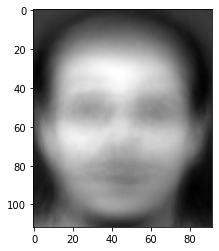

In [27]:
#displaying the mean face of the training data set.
plt.imshow(trainMean.reshape(112,92), cmap='gray');

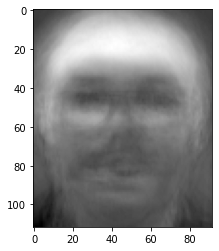

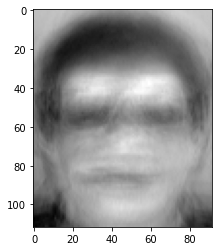

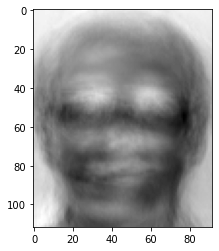

In [28]:
#displaying the largest three eigen vectors as images.
eigenFace1 = eigVectMatrix[:,0].reshape(112,92)
eigenFace2 = eigVectMatrix[:,1].reshape(112,92)
eigenFace3 = eigVectMatrix[:,2].reshape(112,92)
plt.imshow(eigenFace1, cmap='gray');
plt.figure()
plt.imshow(eigenFace2, cmap='gray');
plt.figure()
plt.imshow(eigenFace3, cmap='gray');

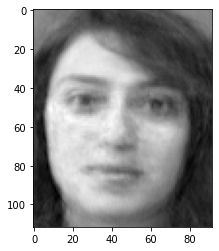

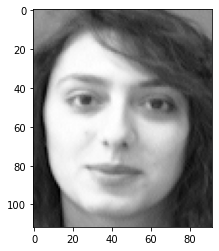

In [29]:
#Reconstruction of a face using PCA eigen vectors ,where alpha = 0.95.
reconstrutedfaces = (reducedDimTrain4.T @ projMat4.T ) + trainMean
#Comparing the reconstructed face and the original face. 
plt.imshow(reconstrutedfaces[50].reshape(112,92), cmap='gray');
plt.figure()
plt.imshow(trainSet[50].reshape(112,92), cmap='gray');


## --------------------------------------------

# PCA Algorithm

In [30]:
def pca(data):
    num_data,dim = data.shape
    mean_x = data.mean(axis=0)
    z = data - mean_x
    cov = (1/dim)*np.dot(z.T,z)
    eigenvals,eigenvecs = np.linalg.eig(cov)
    sort = np.argsort(eigenvals)[::-1]
    diag_eigenvals = np.diag(eigenvals)
    eigenvals = diag_eigenvals[sort]
    eigenvecs = eigenvecs[:,sort]
    large_eignvec = eigenvecs[:,:1]
    new_data = np.dot(np.transpose(large_eignvec),np.transpose(z))
    new_data = np.squeeze(new_data)
    return new_data

## PCA on every image separate without reshaping - data 1

In [31]:
data1 = []
for p in range(1,41):
    for i in range(1,11):
        #print("images//s" + str(p)+ "//"+ str(i) +".pgm")
        img=image.imread("images//s" + str(p)+ "//"+ str(i) +".pgm")
        data1.append(pca(img))

In [32]:
data1 = np.array(data1)

In [33]:
data1.shape

(400, 112)

In [34]:
data1[0,:]

array([-482.7001231 , -514.44875715, -512.76003216, -488.64264274,
       -479.21042011, -473.52246403, -472.04911881, -460.57829846,
       -446.07225565, -428.85460469, -396.35733312, -344.78311279,
       -291.66376737, -241.21254669, -202.78131643, -171.80992576,
       -136.45779408, -119.01354141,  -72.7952156 ,  -39.95092642,
        -19.65754694,  -10.80489998,    6.78719095,   14.37357463,
         22.86703832,   34.01543479,   38.85965236,   36.41196508,
         41.42599144,   40.65129677,   51.92345592,   57.46156814,
         65.40208617,   82.16619844,   88.81913074,   99.0208872 ,
         96.00479434,  103.31590592,   95.90931615,   95.11345277,
         83.85619891,   69.48660507,   46.12538701,   10.54616731,
         -4.69457995,   -1.95415636,   36.34207074,   68.47000995,
         82.61211156,  118.72287778,  159.13125581,  219.75976469,
        264.89662345,  310.54164697,  321.16391116,  332.62434141,
        358.79386103,  390.67184626,  359.1265196 ,  324.11444

## Splitting the PCA data (data 1)

In [35]:
odd_rows=[]
even_rows=[]
odd_target =[]
even_target =[]
for i in range(data1.shape[0]):
    if i %2 == 1:
        odd_rows.append(data1[i])
        odd_target.append(y[i])
    else:
        even_rows.append(data1[i])
        even_target.append(y[i])
        
odd_rows = np.array(odd_rows)
even_rows = np.array(even_rows)
odd_target = np.array(odd_target)
even_target = np.array(even_target)

In [36]:
X_train, X_test, y_train, y_test = odd_rows, even_rows, odd_target, even_target

# Knn Algoritm

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
neighbors =np.array([1,3,5,7])
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [70]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    y_predd2 = knn.predict(X_test)
    print("the accuracy of neighbour "+str(k)+": ", round(accuracy_score(y_predd2,y_test)*100,3) , "%" , sep = "")

the accuracy of neighbour 1: 73.0%
the accuracy of neighbour 3: 61.0%
the accuracy of neighbour 5: 49.5%
the accuracy of neighbour 7: 44.5%


## For data2

In [43]:
neighbors =np.array([1,3,5,7])
train_accuracy1 = np.empty(len(neighbors))
test_accuracy1 = np.empty(len(neighbors))


In [69]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainSet, trainLabel)
    y_predd1 = knn.predict(testSet)
    print("the accuracy of neighbour "+str(k)+": ", round(accuracy_score(y_predd1,testLabel)*100,3) , "%" , sep = "")
    

C:\Users\Katie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Katie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Katie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


the accuracy of neighbour 1: 95.0%
the accuracy of neighbour 3: 93.333%
the accuracy of neighbour 5: 90.0%
the accuracy of neighbour 7: 82.5%


C:\Users\Katie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Knn Algoritm Bonus

In [46]:
neighbors =np.array([1,3,5,7])
train_accuracy2 = np.empty(len(neighbors))
test_accuracy2 = np.empty(len(neighbors))

In [67]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train2, y_train2)
    y_predd = knn.predict(X_test2)
    print("the accuracy of neighbour "+str(k)+": ", round(accuracy_score(y_predd,y_test2)*100,3) , "%" , sep = "")

the accuracy of neighbour 1: 98.333%
the accuracy of neighbour 3: 88.333%
the accuracy of neighbour 5: 81.667%
the accuracy of neighbour 7: 79.167%
